This example is created based on `mlxtend` library's documentation page ([link](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)). This notebook demonstrates some basic concepts of association analysis 

### Import Packages

In [2]:
import pandas as pd
from itertools import combinations
from mlxtend.preprocessing import TransactionEncoder

### Data

Let's create a toy data set for this exercise.

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Garlic', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

### Prepare (transform) data

Binary representation

In [4]:
te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)

te_ary

array([[False, False, False,  True, False, False,  True,  True,  True,
         True,  True],
       [False, False,  True,  True, False, False,  True, False,  True,
         True,  True],
       [ True, False, False,  True, False, False,  True,  True, False,
        False, False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False,  True],
       [False,  True, False,  True, False,  True,  True, False, False,
         True, False]])

In [5]:
te.columns_

['Apple',
 'Corn',
 'Dill',
 'Eggs',
 'Garlic',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Yogurt']

In [6]:
# let's create a dataframe from these results
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,Apple,Corn,Dill,Eggs,Garlic,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Yogurt
0,False,False,False,True,False,False,True,True,True,True,True
1,False,False,True,True,False,False,True,False,True,True,True
2,True,False,False,True,False,False,True,True,False,False,False
3,False,True,False,False,True,False,True,True,False,False,True
4,False,True,False,True,False,True,True,False,False,True,False


### `Support`

Calculate `support` for each individual product.

In [7]:
df.sum()

Apple           1
Corn            2
Dill            1
Eggs            4
Garlic          1
Ice cream       1
Kidney Beans    5
Milk            3
Nutmeg          2
Onion           3
Yogurt          3
dtype: int64

In [8]:
item_supports = df.sum() / len(df)

item_supports

Apple           0.2
Corn            0.4
Dill            0.2
Eggs            0.8
Garlic          0.2
Ice cream       0.2
Kidney Beans    1.0
Milk            0.6
Nutmeg          0.4
Onion           0.6
Yogurt          0.6
dtype: float64

In [9]:
item_supports = item_supports.sort_values(ascending=False)

print (item_supports)

Kidney Beans    1.0
Eggs            0.8
Milk            0.6
Onion           0.6
Yogurt          0.6
Corn            0.4
Nutmeg          0.4
Apple           0.2
Dill            0.2
Garlic          0.2
Ice cream       0.2
dtype: float64


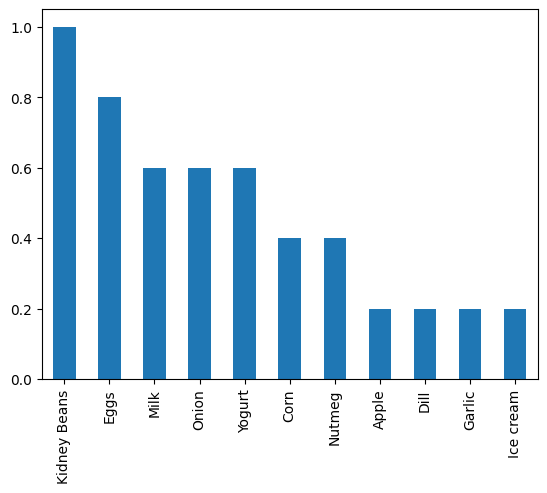

In [10]:
item_supports.plot.bar();

Extract all two-way combinations.

In [11]:
# let's take the first row as an example first
dataset[0]

['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt']

In [12]:
# extract all two-way combinations
list(combinations(dataset[0], 2))

[('Milk', 'Onion'),
 ('Milk', 'Nutmeg'),
 ('Milk', 'Kidney Beans'),
 ('Milk', 'Eggs'),
 ('Milk', 'Yogurt'),
 ('Onion', 'Nutmeg'),
 ('Onion', 'Kidney Beans'),
 ('Onion', 'Eggs'),
 ('Onion', 'Yogurt'),
 ('Nutmeg', 'Kidney Beans'),
 ('Nutmeg', 'Eggs'),
 ('Nutmeg', 'Yogurt'),
 ('Kidney Beans', 'Eggs'),
 ('Kidney Beans', 'Yogurt'),
 ('Eggs', 'Yogurt')]

We can use this approach to calculate `support` for each pair of items _from the entire dataset_.

In [13]:
# save each two-way item pair into an array
item_pairs = []

for i, order in enumerate(dataset):
    pairs = combinations(set(order), 2)
    
    # for each product pair
    for item_pair in pairs:
        item_pairs.append(item_pair)
        
len(item_pairs)

56

In [14]:
item_pairs

[('Onion', 'Yogurt'),
 ('Onion', 'Nutmeg'),
 ('Onion', 'Kidney Beans'),
 ('Onion', 'Eggs'),
 ('Onion', 'Milk'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Kidney Beans'),
 ('Yogurt', 'Eggs'),
 ('Yogurt', 'Milk'),
 ('Nutmeg', 'Kidney Beans'),
 ('Nutmeg', 'Eggs'),
 ('Nutmeg', 'Milk'),
 ('Kidney Beans', 'Eggs'),
 ('Kidney Beans', 'Milk'),
 ('Eggs', 'Milk'),
 ('Onion', 'Dill'),
 ('Onion', 'Yogurt'),
 ('Onion', 'Nutmeg'),
 ('Onion', 'Kidney Beans'),
 ('Onion', 'Eggs'),
 ('Dill', 'Yogurt'),
 ('Dill', 'Nutmeg'),
 ('Dill', 'Kidney Beans'),
 ('Dill', 'Eggs'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Kidney Beans'),
 ('Yogurt', 'Eggs'),
 ('Nutmeg', 'Kidney Beans'),
 ('Nutmeg', 'Eggs'),
 ('Kidney Beans', 'Eggs'),
 ('Kidney Beans', 'Milk'),
 ('Kidney Beans', 'Apple'),
 ('Kidney Beans', 'Eggs'),
 ('Milk', 'Apple'),
 ('Milk', 'Eggs'),
 ('Apple', 'Eggs'),
 ('Yogurt', 'Milk'),
 ('Yogurt', 'Kidney Beans'),
 ('Yogurt', 'Corn'),
 ('Yogurt', 'Garlic'),
 ('Milk', 'Kidney Beans'),
 ('Milk', 'Corn'),
 ('Milk', 'Garlic')

Count how frequent each item-pair is.

In [15]:
from collections import Counter

Counter(tuple(sorted(elem)) for elem in item_pairs)

Counter({('Eggs', 'Kidney Beans'): 4,
         ('Kidney Beans', 'Onion'): 3,
         ('Eggs', 'Onion'): 3,
         ('Kidney Beans', 'Yogurt'): 3,
         ('Kidney Beans', 'Milk'): 3,
         ('Onion', 'Yogurt'): 2,
         ('Nutmeg', 'Onion'): 2,
         ('Nutmeg', 'Yogurt'): 2,
         ('Eggs', 'Yogurt'): 2,
         ('Milk', 'Yogurt'): 2,
         ('Kidney Beans', 'Nutmeg'): 2,
         ('Eggs', 'Nutmeg'): 2,
         ('Eggs', 'Milk'): 2,
         ('Corn', 'Kidney Beans'): 2,
         ('Milk', 'Onion'): 1,
         ('Milk', 'Nutmeg'): 1,
         ('Dill', 'Onion'): 1,
         ('Dill', 'Yogurt'): 1,
         ('Dill', 'Nutmeg'): 1,
         ('Dill', 'Kidney Beans'): 1,
         ('Dill', 'Eggs'): 1,
         ('Apple', 'Kidney Beans'): 1,
         ('Apple', 'Milk'): 1,
         ('Apple', 'Eggs'): 1,
         ('Corn', 'Yogurt'): 1,
         ('Garlic', 'Yogurt'): 1,
         ('Corn', 'Milk'): 1,
         ('Garlic', 'Milk'): 1,
         ('Garlic', 'Kidney Beans'): 1,
         ('Corn

We must use `sorted()` option here because otherwise (Eggs, Kidney Beans) is considered a different set than (Kidney Beans, Eggs).

Let's save the results in a dictionary and sort it in descending order of frequency.

In [16]:
item_pair_ct = Counter(tuple(sorted(elem)) for elem in item_pairs)

item_pair_ct.items()

dict_items([(('Onion', 'Yogurt'), 2), (('Nutmeg', 'Onion'), 2), (('Kidney Beans', 'Onion'), 3), (('Eggs', 'Onion'), 3), (('Milk', 'Onion'), 1), (('Nutmeg', 'Yogurt'), 2), (('Kidney Beans', 'Yogurt'), 3), (('Eggs', 'Yogurt'), 2), (('Milk', 'Yogurt'), 2), (('Kidney Beans', 'Nutmeg'), 2), (('Eggs', 'Nutmeg'), 2), (('Milk', 'Nutmeg'), 1), (('Eggs', 'Kidney Beans'), 4), (('Kidney Beans', 'Milk'), 3), (('Eggs', 'Milk'), 2), (('Dill', 'Onion'), 1), (('Dill', 'Yogurt'), 1), (('Dill', 'Nutmeg'), 1), (('Dill', 'Kidney Beans'), 1), (('Dill', 'Eggs'), 1), (('Apple', 'Kidney Beans'), 1), (('Apple', 'Milk'), 1), (('Apple', 'Eggs'), 1), (('Corn', 'Yogurt'), 1), (('Garlic', 'Yogurt'), 1), (('Corn', 'Milk'), 1), (('Garlic', 'Milk'), 1), (('Corn', 'Kidney Beans'), 2), (('Garlic', 'Kidney Beans'), 1), (('Corn', 'Garlic'), 1), (('Corn', 'Onion'), 1), (('Ice cream', 'Onion'), 1), (('Ice cream', 'Kidney Beans'), 1), (('Corn', 'Eggs'), 1), (('Corn', 'Ice cream'), 1), (('Eggs', 'Ice cream'), 1)])

In [17]:
# sort the array ot tuples from high to low frequency
sorted(item_pair_ct.items(), key=lambda x: x[1], reverse=True)

[(('Eggs', 'Kidney Beans'), 4),
 (('Kidney Beans', 'Onion'), 3),
 (('Eggs', 'Onion'), 3),
 (('Kidney Beans', 'Yogurt'), 3),
 (('Kidney Beans', 'Milk'), 3),
 (('Onion', 'Yogurt'), 2),
 (('Nutmeg', 'Onion'), 2),
 (('Nutmeg', 'Yogurt'), 2),
 (('Eggs', 'Yogurt'), 2),
 (('Milk', 'Yogurt'), 2),
 (('Kidney Beans', 'Nutmeg'), 2),
 (('Eggs', 'Nutmeg'), 2),
 (('Eggs', 'Milk'), 2),
 (('Corn', 'Kidney Beans'), 2),
 (('Milk', 'Onion'), 1),
 (('Milk', 'Nutmeg'), 1),
 (('Dill', 'Onion'), 1),
 (('Dill', 'Yogurt'), 1),
 (('Dill', 'Nutmeg'), 1),
 (('Dill', 'Kidney Beans'), 1),
 (('Dill', 'Eggs'), 1),
 (('Apple', 'Kidney Beans'), 1),
 (('Apple', 'Milk'), 1),
 (('Apple', 'Eggs'), 1),
 (('Corn', 'Yogurt'), 1),
 (('Garlic', 'Yogurt'), 1),
 (('Corn', 'Milk'), 1),
 (('Garlic', 'Milk'), 1),
 (('Garlic', 'Kidney Beans'), 1),
 (('Corn', 'Garlic'), 1),
 (('Corn', 'Onion'), 1),
 (('Ice cream', 'Onion'), 1),
 (('Ice cream', 'Kidney Beans'), 1),
 (('Corn', 'Eggs'), 1),
 (('Corn', 'Ice cream'), 1),
 (('Eggs', 'Ice cr

In [18]:
# store the sorted results
item_pair_ct_sorted = sorted(item_pair_ct.items(), key=lambda x: x[1], reverse=True)

# let's calculate the percentages (i.e., support) from these counts
item_pair_pct_sorted = {}

for i, item_pair in enumerate(item_pair_ct_sorted):
    item_pair_pct_sorted[item_pair[0]] = item_pair[1] / len(dataset)
    
print (item_pair_pct_sorted)

{('Eggs', 'Kidney Beans'): 0.8, ('Kidney Beans', 'Onion'): 0.6, ('Eggs', 'Onion'): 0.6, ('Kidney Beans', 'Yogurt'): 0.6, ('Kidney Beans', 'Milk'): 0.6, ('Onion', 'Yogurt'): 0.4, ('Nutmeg', 'Onion'): 0.4, ('Nutmeg', 'Yogurt'): 0.4, ('Eggs', 'Yogurt'): 0.4, ('Milk', 'Yogurt'): 0.4, ('Kidney Beans', 'Nutmeg'): 0.4, ('Eggs', 'Nutmeg'): 0.4, ('Eggs', 'Milk'): 0.4, ('Corn', 'Kidney Beans'): 0.4, ('Milk', 'Onion'): 0.2, ('Milk', 'Nutmeg'): 0.2, ('Dill', 'Onion'): 0.2, ('Dill', 'Yogurt'): 0.2, ('Dill', 'Nutmeg'): 0.2, ('Dill', 'Kidney Beans'): 0.2, ('Dill', 'Eggs'): 0.2, ('Apple', 'Kidney Beans'): 0.2, ('Apple', 'Milk'): 0.2, ('Apple', 'Eggs'): 0.2, ('Corn', 'Yogurt'): 0.2, ('Garlic', 'Yogurt'): 0.2, ('Corn', 'Milk'): 0.2, ('Garlic', 'Milk'): 0.2, ('Garlic', 'Kidney Beans'): 0.2, ('Corn', 'Garlic'): 0.2, ('Corn', 'Onion'): 0.2, ('Ice cream', 'Onion'): 0.2, ('Ice cream', 'Kidney Beans'): 0.2, ('Corn', 'Eggs'): 0.2, ('Corn', 'Ice cream'): 0.2, ('Eggs', 'Ice cream'): 0.2}


### `Support` Filter

In [19]:
# for this exercise, we will use a support threshold of 0.6
min_support = 0.5

# extract all items that satisfy the support criterion
item_supports[item_supports >= min_support]

Kidney Beans    1.0
Eggs            0.8
Milk            0.6
Onion           0.6
Yogurt          0.6
dtype: float64

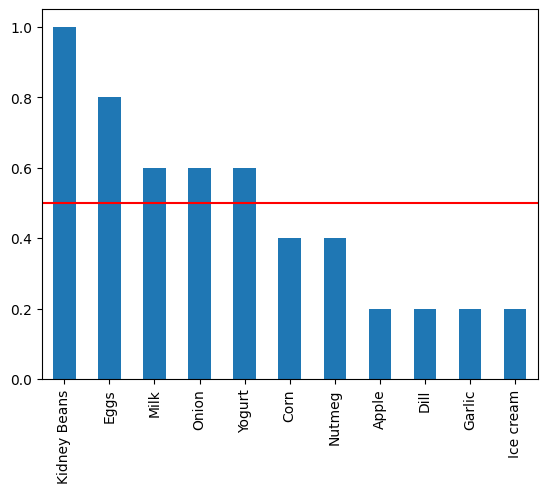

In [20]:
ax = item_supports.plot.bar()
ax.axhline(min_support, c='r');

In [21]:
# print all item-sets that satisfy the support criterion
for key, value in item_pair_pct_sorted.items():
    if value >= min_support:
        print (key, value)

('Eggs', 'Kidney Beans') 0.8
('Kidney Beans', 'Onion') 0.6
('Eggs', 'Onion') 0.6
('Kidney Beans', 'Yogurt') 0.6
('Kidney Beans', 'Milk') 0.6


______

Instead of doing all these calculations manually, we can use `mlxtend`.

In [22]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [23]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0,0.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf,0.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
8,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
9,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0


If you are interested in rules according to a different metric of interest, you can simply adjust the metric and `min_threshold` arguments . E.g. if you are only interested in rules that have a `lift` of >= 1.2, you would do the following:

In [24]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
2,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
5,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0


Pandas DataFrames make it easy to filter the results further. Let's say we are ony interested in rules that satisfy the following criteria:

1. at least 2 antecedents
2. a confidence > 0.75
3. a lift score > 1.2

We could compute the antecedent length as follows:

In [25]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,1
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,1
2,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,2
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,2
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,1
5,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,1


Then, we can use pandas' selection syntax as shown below:

In [26]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
2,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5,2
